In [21]:
from __future__ import division
import glob
import xclim as xc
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# paths
geomip_dir = "/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/"
scomip_dir = "/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/"

# read data
# G6sulfur
g6sulfur_files = glob.glob(geomip_dir+"G6sulfur/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_sulfur = xr.open_mfdataset(g6sulfur_files).sel(time=slice('2090-01-01','2100-12-30'))
# G6solar
g6solar_files = glob.glob(geomip_dir+"G6solar/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_solar = xr.open_mfdataset(g6solar_files).sel(time=slice('2090-01-01','2100-12-30'))
# SSP245
ssp245_files = glob.glob(scomip_dir+"ssp245/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_245 = xr.open_mfdataset(ssp245_files).sel(time=slice('2090-01-01','2100-12-30'))
# SSP585
ssp585_files = glob.glob(scomip_dir+"ssp585/r1i1p1f2/day/pr/gn/latest/*20500101-21001230.nc")
ds_585 = xr.open_mfdataset(ssp585_files).sel(time=slice('2090-01-01','2100-12-30'))

In [3]:
print(ds_585)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 3960)
Coordinates:
  * time       (time) object 2090-01-01 12:00:00 ... 2100-12-30 12:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(3960, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(3960, 144, 192), meta=np.ndarray>
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2019-07-24T12:55:41Z
    ...                 

In [4]:
# calculate RX5day 
rx_sulfur = xc.indicators.icclim.RX5day(ds_sulfur.pr, freq="MS")
rx_solar = xc.indicators.icclim.RX5day(ds_solar.pr, freq="MS")
rx_245 = xc.indicators.icclim.RX5day(ds_245.pr, freq="MS")
rx_585 = xc.indicators.icclim.RX5day(ds_585.pr, freq="MS")

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: time: mean`, expected `['time: mean*']`
  check_valid(


In [6]:
print(rx_solar)

<xarray.DataArray 'RX5day' (time: 132, lat: 144, lon: 192)>
dask.array<where, shape=(132, 144, 192), dtype=float64, chunksize=(1, 144, 192), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2090-01-01 00:00:00 ... 2100-12-01 00:00:00
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    units:          mm
    cell_methods:   area: time: mean time: sum within days time: maximum over...
    xclim_history:  2019-10-30T10:08:12Z altered by CMOR: replaced missing va...
    standard_name:  lwe_thickness_of_precipitation_amount
    long_name:      Highest 5-day precipitation amount
    description:    Monthly maximum 5-day total precipitation.


In [11]:
rx_solar.mean('time')

<xarray.DataArray 'RX5day' (lat: 144, lon: 192)>
dask.array<mean_agg-aggregate, shape=(144, 192), dtype=float64, chunksize=(144, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1

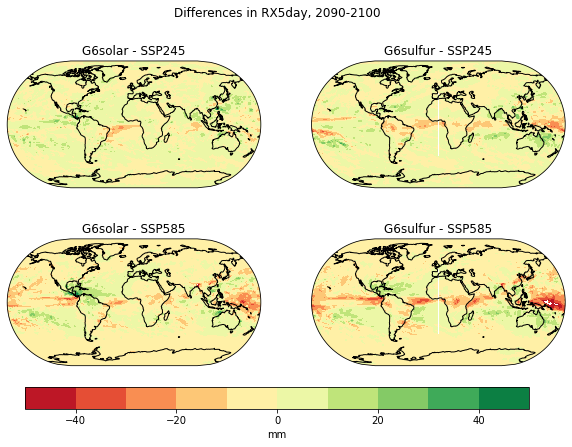

In [67]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), subplot_kw={'projection': ccrs.EckertIII()})
cf1 = axs[0,0].contourf(rx_solar.lon, rx_solar.lat, rx_solar.mean('time')-rx_245.mean('time'), \
                        levels=np.linspace(-50,50,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,0].coastlines()
axs[0,0].set_global()
axs[0,0].set_title("G6solar - SSP245")

cf2 = axs[0,1].contourf(rx_sulfur.lon, rx_sulfur.lat, rx_sulfur.mean('time')-rx_245.mean('time'), \
                        levels=np.linspace(-50,50,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[0,1].coastlines()
axs[0,1].set_global()
axs[0,1].set_title("G6sulfur - SSP245")

cf3 = axs[1,0].contourf(rx_solar.lon, rx_solar.lat, rx_solar.mean('time')-rx_585.mean('time'), \
                        levels=np.linspace(-50,50,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,0].coastlines()
axs[1,0].set_global()
axs[1,0].set_title("G6solar - SSP585")

cf4 = axs[1,1].contourf(rx_sulfur.lon, rx_sulfur.lat, rx_sulfur.mean('time')-rx_585.mean('time'), \
                        levels=np.linspace(-50,50,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
axs[1,1].coastlines()
axs[1,1].set_global()
axs[1,1].set_title("G6sulfur - SSP585")

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.05])
fig.colorbar(cf1, orientation='horizontal', label="mm", cax=cbar_ax)

fig.suptitle("Differences in RX5day, 2090-2100")
plt.savefig("plots/CMIP6Hackathon/diff_G6_SSP_rx5day_2090-2100_dpi150.png", format="png", dpi=150)

plt.show()

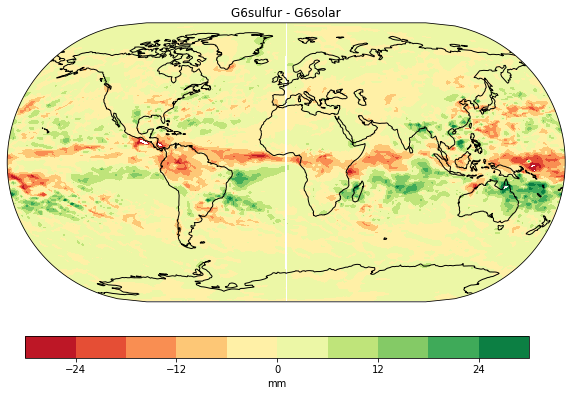

In [65]:
fig2 = plt.figure(figsize=(10, 6))
ax = fig2.add_subplot(1, 1, 1, projection=ccrs.EckertIII())
cf5 = ax.contourf(rx_sulfur.lon, rx_sulfur.lat, rx_sulfur.mean('time')-rx_solar.mean('time'), \
                  levels=np.linspace(-30,30,11), transform=ccrs.PlateCarree(), cmap='RdYlGn')
ax.coastlines()
ax.set_global()
ax.set_title("G6sulfur - G6solar")

cbar_ax2 = fig2.add_axes([0.15, 0.05, 0.7, 0.05])
fig.colorbar(cf5, orientation='horizontal', label="mm", cax=cbar_ax2)
plt.savefig("plots/CMIP6Hackathon/diff_G6sulfur_G6solar_rx5day_2090-2100_dpi150.png", format="png", dpi=150)
plt.show()

In [66]:
np.linspace(-30,30,9)

array([-30. , -22.5, -15. ,  -7.5,   0. ,   7.5,  15. ,  22.5,  30. ])